# DH 2018 Workshop on Word Vectors

## **Welcome to Machine Reading!**

This is a hands-on workshop focusing on various word vectorization methods and applications for digital humanities.
The workshop will be split into 4 sections with 10 minute breaks in-between. The sections get incrementally more advanced, building on concepts and methods from the previous sections.

To follow along, you can run the script portions piecemeal, in order, as we progress through the workshop material.



## 1. Understanding Word Vectors with Visualization (50 mins)

This unit will give a brief introduction of word vectors and word embeddings. Concepts needed to understand the internal mechanics of how they work will also be explained, with the help of plots and visualizations that are commonly used when working with them.


- 0:00 - 0:20 From word counts to ML-derived Word Vectors (SVD, PMI, etc.)
- 0:20 - 0:35 Clustering, Vector Math, Vector Space Theory (Euclidean Distance, etc.)
- 0:35 - 0:50 [Activity 1] Visualizations (Clustering, PCA, t-SNE) [We provide vectors]

1. What are the limitations of these word vectors?
2. What are the different use cases between count-based vectors and word2vec? (size of corpus)
3. What are limitations?
4. Why do we use Word2Vec instead?

## 2. Word Vectors via Word2Vec (50 mins)

This unit will focus on Word2Vec as an example of neural net-based approaches of vector encodings, starting with a conceptual overview of the algorithm itself and ending with an activity to train participants’ own vectors.


- 0:00 - 0:15 Conceptual explanation of Word2Vec
- 0:15 - 0:30 Word2Vec Visualization and Vectorial Features and Math
- 0:30 - 0:50 [Activity 2] Word2Vec Construction [using Gensim] and Visualization (from part 1) [We provide corpus]


## 3. Pre-trained Models and Extended Vector Algorithms (50 mins)

This unit will explore the various flavors of word embeddings specifically tailored to sentences, word meaning, paragraph, or entire documents. We will give an overview of pre-trained embeddings, including where they can be found and how to use them.

- 0:00 - 0:20 Pre-trained word embeddings (where to find them, which are good, configurations, trained corpus, etc., e.g. https://github.com/facebookresearch/fastText)
- 0:20 - 0:35 Overview of other 2Vecs & other vector engineering: Paragraph2Vec, Sense2Vec, Doc2Vec, etc.
- 0:35 - 0:50 [Activity 3] Choose, download, and use a pre-trained model

## 4. Role of Bias in Word Embeddings (50 mins)

In this unit, we will explore an application and caveat of using word embeddings -- cultural bias. Presenting methods and results from recent articles, we will show how word embeddings can carry the historical biases of the training corpora and lead an activity that shows these human-biases on vectors. We'll also address how such bias can be mitigated.

- 0:00 - 0:10 Algorithmic bias vs human bias 
- 0:10 - 0:40 [Activity 4] Identifying bias in corpora (occupations, gender, ...) [GloVe]
- 0:40 - 0:50 Towards unbiased embeddings; Examine “debiased” embeddings
- 0:50 - 0:60 Conclusion remarks and debate


# 0. Setting Up 

Before we get started, let's go ahead and set up our notebook.

We will start by importing a few Python libraries that we will use throughout the workshop.

## What are these libraries?

1. NumPy: This is a package for scientific computing in python. For us, NumPy is useful for vector operations. 
2. NLTK: Easy to use python package for text processing (lemmatization, tokenization, POS-tagging, etc.)
3. matplotlib: Plotting package for visualization
4. sciKit-learn: Easy to use python package for machine learning algorithms and preprocessing tools
5. gensim: Builtin word2vec and other NLP algorithms

We will be working with a few sample texts using NLTK's corpus package.

In [1]:
%%capture --no-stderr
import sys

!pip install -q numpy nltk scikit-learn matplotlib gensim 
!python -m nltk.downloader all
print("All done!", file=sys.stderr)

All done!


If all went well, we should be able now to import the next packages into our workspace

In [2]:
import numpy as np
import nltk
import sklearn
import matplotlib.pyplot as plt
import gensim

from IPython.display import HTML   #This is just for notebook layout



---



# 1. Understanding Word Vectors with Visualization



## What is a word vector?

A word vector or embedding is a **numerical representation** of a word within a corpus based on co-occurence with other words. Linguists have found that much of the meaning of a word can be derived from looking at its surrounding context. In this unit, we will explore a few major approaches to representing words in a numerical format.

## What is a vector?

Before anything related to words or text let's make sure we're on the same page about vectors! A vector is just a list/array of real numbers. A vector has a size/length which indicates how many numbers are in it. 

In [4]:
# In python you can make a vector using square brackets '[]'.
vector_one = [1,2,3]
vector_two = [1,2,34.53222222]

Here is a list of 5 real numbers (represented as floating point numbers). This vector has 5 dimensions or features.

In [5]:
# Here you can generate a vector of random floats with the random function from numpy
# You'll see that every time you run this command you get a series of different numbers - try it!
# In this instance we're making a vector of length (or size) 5

vector_of_floats = np.random.randn(5)
vector_of_floats

array([ 0.36993279,  0.53722682, -0.63760645, -0.60475944, -0.15884598])

Here is a list of 20 integers between 0 and 3 (exclusive; not including 3). Later we will go into more vector math but you can see that a vector is a multi-dimensional numerical representation.

In [6]:
# You can call a vector of random integers too
# There are three inputs here: the start range of your integer, 
# the end range(exclusive), and the size of the vector
# In our example, the range is [0, 3] 

vector_of_ints = np.random.randint(0, 3, size=20)
vector_of_ints

array([0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 1, 0, 0, 2, 0, 1, 2, 2, 2, 2])

Word vectors (and vectors in general) can be largely classified into **sparse** and **dense** vectors. A **sparse** vector is just a vector with lots of 0's. When the vector represents countings of a word that co-occurs with other words, these vectors tend to be **sparse** since only a few pairs of words will co-ocur in practice.

In [8]:
HTML("""
<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Activity
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">
Your turn: Generate a vector including integers from 4 to 8 of size 10
<br>
<em>
<strong>Hint</strong>: Use the numpy functions
</em>
</p>
</div>
""")

In [9]:
np.random.randint(...)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'ellipsis'

## Document-term matrix

Let's import `scikit-learn`'s `CountVectorizer()`



In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
documents = [
    "This is a piece of text. This is also some random text. Also text.",
]

Let's now transform this document so that each word is given a unique identifying number.

In [12]:
example_vectorizer = CountVectorizer()
example_vectorizer.fit(documents)
print("Vocabulary size:", len(example_vectorizer.vocabulary_))
example_vectorizer.vocabulary_

Vocabulary size: 8


{'this': 7,
 'is': 1,
 'piece': 3,
 'of': 2,
 'text': 6,
 'also': 0,
 'some': 5,
 'random': 4}

Also, let's add the corresponding frequency number, which gives the total number of times each word appears in each document.

In [13]:
counts = example_vectorizer.transform(documents)
print(counts)
print("   ↑  ↑         ↑\n  doc word_id count")

  (0, 0)	2
  (0, 1)	2
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	3
  (0, 7)	2
   ↑  ↑         ↑
  doc word_id count


Now, let's iterate through all the words that appear in our original document and print all the counts that we generated above.

In [14]:
doc = 0  # first document
for word, word_id in example_vectorizer.vocabulary_.items():
    print(word, ":", counts[doc, word_id])

this : 2
is : 2
piece : 1
of : 1
text : 3
also : 2
some : 1
random : 1


A **document-term matrix** is just a big table (formally, a mathematical matrix) that describes the frequency of words or terms that occur in a collection of documents. In a document-term matrix, **rows correspond to documents** in the collection and **columns correspond to terms**. In 

In our case, since we only have one document, our document-term matrix only has one row (doc `0`) and looks like this.

|             | also | is | of | piece | random | some | text | this |
| ----------- |:----:|:--:|:--:|:-----:|:------:|:----:|:----:|:----:|
| Document #1 |  2   | 2  | 1  | 1     |  1     |  1   |  3   |   2  |

It can easily be extracted by using the `transform()` method our `CountVectorizer()`.

In [15]:
counts = example_vectorizer.transform(documents)
counts.toarray()

array([[2, 2, 1, 1, 1, 1, 3, 2]])

Each element of the matrix represents vocabulary from above, with the placement corresponding to the unique identifier assigned mostly randomly by scikit-learn, eg. 7th placement (8th, starting from 0) is `text`.

Let's now add a new document that looks almost identical but introduces a new word, just to see how this change reflects on the document-term matrix.

In [16]:
documents = [
    "This is a piece of text. This is also some random text. Also text.",
    "This is a piece of text. This is also some random text. Also new text.",
]
example_vectorizer.fit(documents)
print("Vocabulary size:", len(example_vectorizer.vocabulary_))
example_vectorizer.vocabulary_

Vocabulary size: 9


{'this': 8,
 'is': 1,
 'piece': 4,
 'of': 3,
 'text': 7,
 'also': 0,
 'some': 6,
 'random': 5,
 'new': 2}

In [17]:
counts = example_vectorizer.transform(documents)
print(counts)
print("   ↑  ↑         ↑\n  doc word_id count")

  (0, 0)	2
  (0, 1)	2
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	3
  (0, 8)	2
  (1, 0)	2
  (1, 1)	2
  (1, 2)	1
  (1, 3)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	3
  (1, 8)	2
   ↑  ↑         ↑
  doc word_id count


In [18]:
counts = example_vectorizer.transform(documents)
counts.toarray()

array([[2, 2, 0, 1, 1, 1, 1, 3, 2],
       [2, 2, 1, 1, 1, 1, 1, 3, 2]])

Apart from the fact that the vocabulary size is now bigger, just by looking at the document-term matrix we can easily spot that one of our documents has one word more than the other. Certainly, we can spot the difference at column 3 (2 in zero-index Python sequences), which corresponds to the new word introduced, `new`, in our vocabulary.

By now, you might have noticed that 1-letter words are being ignored. That's due to the way `CountVectorizer()` splits sentences into words. `CountVectorizer()` has options to customize this behaviour and it allows to specify your own regular expression to extract words, disregard stopwords, count ngrams instead of words, cap the max number of words to count, normalize spelling, or count terms within a frequency range. It is worth exploring the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html).

Here, we have written up a temporary new regular expression that takes into account 1-letter words, so our `CountVectorizer()` can count 'a' as a vocabulary term. As such you can modify the regex to fix you needs.

In [19]:
new_regex = r"(?u)\b\w+\b"
CountVectorizer(token_pattern=new_regex).fit(documents).vocabulary_

{'this': 9,
 'is': 2,
 'a': 0,
 'piece': 5,
 'of': 4,
 'text': 8,
 'also': 1,
 'some': 7,
 'random': 6,
 'new': 3}

**Let's now play with three texts/documents in our corpus, taken from literature. ** 

We will use Moby Dick as our example corpus.

In [22]:
from nltk.corpus import gutenberg  

NOTE: gutenberg raw vs words, sents

In [23]:
mobydick = gutenberg.raw('melville-moby_dick.txt')
emma = gutenberg.raw('austen-emma.txt')
parents = gutenberg.raw('edgeworth-parents.txt')

In [24]:
corpus = [mobydick, emma, parents]

In [25]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit([mobydick])
print("Vocabulary size:", len(count_vectorizer.vocabulary_))
count_vectorizer.vocabulary_

Vocabulary size: 17110


{'moby': 9572,
 'dick': 4213,
 'by': 2167,
 'herman': 7077,
 'melville': 9363,
 '1851': 81,
 'etymology': 5184,
 'supplied': 14615,
 'late': 8561,
 'consumptive': 3280,
 'usher': 16154,
 'to': 15250,
 'grammar': 6568,
 'school': 12890,
 'the': 15019,
 'pale': 10535,
 'threadbare': 15108,
 'in': 7614,
 'coat': 2868,
 'heart': 6975,
 'body': 1752,
 'and': 666,
 'brain': 1884,
 'see': 13036,
 'him': 7128,
 'now': 10079,
 'he': 6942,
 'was': 16563,
 'ever': 5209,
 'dusting': 4710,
 'his': 7148,
 'old': 10246,
 'lexicons': 8717,
 'grammars': 6569,
 'with': 16885,
 'queer': 11819,
 'handkerchief': 6818,
 'mockingly': 9579,
 'embellished': 4902,
 'all': 541,
 'gay': 6314,
 'flags': 5784,
 'of': 10212,
 'known': 8447,
 'nations': 9886,
 'world': 16968,
 'loved': 8956,
 'dust': 4709,
 'it': 8151,
 'somehow': 13806,
 'mildly': 9463,
 'reminded': 12209,
 'mortality': 9681,
 'while': 16748,
 'you': 17083,
 'take': 14825,
 'hand': 6810,
 'others': 10364,
 'teach': 14911,
 'them': 15024,
 'what': 16

Noticed something missing? Take a look at the parameter [`token_pattern` of `CountVectorizer()`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). The way a chunk of text is divided up in sentences and then in words is dependent upon our definitions of sentence and word boundaries. The process of splitting a text in words is usually known as **tokenization**. While the most simple *tokenizers* would split sentences on dots and words on spaces, these rules don't always take into account all cases (e.g, "Dr. Evil is not that bad." would be split in two sentences, "Dr" and "Evil is not that bad"). For this reason, more complex rules can be set using [regular expressions](https://en.wikipedia.org/wiki/Regular_expression) and then passed in to `CountVectorizer()` via the `token_pattern` parameter.


In [26]:
new_regex = r"(?u)\b\w+\b"

NOTE no numbers regex

NOTE for tokenized corpora:  you need to pass in extra parameters to count vectorize


analyzer='word', tokenizer=lambda x: x

To get the ID of a given vocab term:

In [27]:
lit_vectorizer = CountVectorizer(token_pattern=new_regex)
lit_vectorizer.fit([mobydick])
print("Vocabulary size:", len(lit_vectorizer.vocabulary_))
lit_vectorizer.vocabulary_

Vocabulary size: 17140


{'moby': 9592,
 'dick': 4225,
 'by': 2177,
 'herman': 7093,
 'melville': 9383,
 '1851': 82,
 'etymology': 5197,
 'supplied': 14639,
 'a': 189,
 'late': 8580,
 'consumptive': 3291,
 'usher': 16180,
 'to': 15275,
 'grammar': 6583,
 'school': 12914,
 'the': 15044,
 'pale': 10558,
 'threadbare': 15133,
 'in': 7631,
 'coat': 2879,
 'heart': 6991,
 'body': 1762,
 'and': 676,
 'brain': 1894,
 'i': 7440,
 'see': 13060,
 'him': 7144,
 'now': 10100,
 'he': 6958,
 'was': 16591,
 'ever': 5222,
 'dusting': 4722,
 'his': 7164,
 'old': 10268,
 'lexicons': 8736,
 'grammars': 6584,
 'with': 16913,
 'queer': 11842,
 'handkerchief': 6834,
 'mockingly': 9599,
 'embellished': 4915,
 'all': 551,
 'gay': 6329,
 'flags': 5798,
 'of': 10234,
 'known': 8465,
 'nations': 9907,
 'world': 16996,
 'loved': 8975,
 'dust': 4721,
 'it': 8168,
 'somehow': 13830,
 'mildly': 9483,
 'reminded': 12232,
 'mortality': 9701,
 'while': 16776,
 'you': 17113,
 'take': 14850,
 'hand': 6826,
 'others': 10386,
 'teach': 14936,
 'th

In [28]:
X = lit_vectorizer.fit_transform(corpus)

This is what the doc-term matrix looks like for our three document corpus.

In [29]:
X.toarray()

array([[20,  2,  4, ...,  0,  2,  1],
       [ 2,  0,  2, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  1,  0,  0]], dtype=int64)

NOTE: each row corresponds to each document; each column of words in our vocabulary

In [30]:
print("The ID of the word 'piece' is ", str(count_vectorizer.vocabulary_.get('piece')))

The ID of the word 'piece' is  10968


The dimensions of the matrix are given by the shape property.

In [31]:
X.toarray().shape

(3, 21615)

In [32]:
print("The doc-term matrix has {} documents and {} dimensions.".format(str(X.toarray().shape[0]), str(X.toarray().shape[1])))

The doc-term matrix has 3 documents and 21615 dimensions.


These dimensions represent one unique vocabulary. 

In [33]:
lit_vectorizer.get_feature_names() 

['000',
 '1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '12',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '13',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '14',
 '1414',
 '144',
 '1492',
 '15',
 '150',
 '15o',
 '15th',
 '16',
 '1652',
 '1668',
 '1671',
 '1690',
 '1695',
 '16th',
 '17',
 '1726',
 '1729',
 '1750',
 '1772',
 '1775',
 '1776',
 '1778',
 '1779',
 '1788',
 '1791',
 '1793',
 '1795',
 '1799',
 '17oo',
 '17th',
 '18',
 '180',
 '1807',
 '1816',
 '1819',
 '1820',
 '1821',
 '1825',
 '1828',
 '1833',
 '1836',
 '1839',
 '1840',
 '1842',
 '1846',
 '1850',
 '1851',
 '18th',
 '19',
 '1st',
 '2',
 '20',
 '2000',
 '200th',
 '21',
 '21st',
 '22',
 '22nd',
 '23',
 '23rd',
 '24',
 '24th',
 '25',
 '25th',
 '26',
 '26th',
 '27',
 '275th',
 '28',
 '28th',
 '29',
 '299',
 '29th',
 '2nd',
 '3',
 '30',
 '31',
 '31st',
 '32',

Let's get vocab ID's for 'happy', 'sad', 'angry'

In [35]:
print(lit_vectorizer.vocabulary_.get('happy'))
print(lit_vectorizer.vocabulary_.get('sad'))
print(lit_vectorizer.vocabulary_.get('angry'))

8860
16233
1059


Word-word Matrix

In [36]:
WW = X.T * X

Talk about the matrix math; symmetric matrix

In [37]:
WW.toarray()

array([[404,  40,  84, ...,   0,  40,  20],
       [ 40,   4,   8, ...,   0,   4,   2],
       [ 84,   8,  20, ...,   0,   8,   4],
       ...,
       [  0,   0,   0, ...,   1,   0,   0],
       [ 40,   4,   8, ...,   0,   4,   2],
       [ 20,   2,   4, ...,   0,   2,   1]], dtype=int64)

In [38]:
WW.shape

(21615, 21615)

In [39]:
happy_vector = WW[3775,:]
sad_vector = WW[6941,:]
angry_vector = WW[381,:]

In [40]:
angry_vector.toarray()

array([[10,  0, 10, ...,  0,  0,  0]])

PPMI Matrix

**Dense Vectorization**

SVD

In [41]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=8)

In [42]:
dense = svd.fit_transform(WW) #n_samples, n_dims

In [43]:
dense.shape

(21615, 8)

In [44]:
happy_vector_dense = dense[3775,:]
sad_vector_dense = dense[6941,:]
angry_vector_dense = dense[381,:]

In [45]:
happy_vector_dense

array([ 6.17428676e+04,  1.41191503e+04, -1.61616505e+03,  5.76041794e-11,
       -7.92371788e-12, -5.54421465e-12, -8.12995032e-12,  2.63880898e-11])

**Vector** **Math**

There are several ways of working with vectors in data science. Since we are working with text data converted into numerial vectors, many of these methods can be applied for text analysis too. Some specific methods tend to perform better for text and these include cosine similarity (over euclidean distance) and k-means (over k-mode or others). 


Cosine Similarity

In [46]:
from sklearn.metrics.pairwise import cosine_similarity as cossim

In [49]:
# So that we can see more contrast when evaluating similarity, let's add in a rather different word: 'biscuit'.
print(lit_vectorizer.vocabulary_.get('biscuit'))
biscuit_vector_dense = dense[2226,:]

2226


In [51]:
happy_vector = happy_vector_dense.reshape(1,-1) #n_samples_X, n_features
sad_vector = sad_vector_dense.reshape(1,-1)
angry_vector = angry_vector_dense.reshape(1,-1)
biscuit_vector = biscuit_vector_dense.reshape(1,-1)

In [52]:
cossim(happy_vector, sad_vector)

array([[0.90384606]])

In [53]:
cossim(angry_vector, sad_vector)

array([[0.99307557]])

In [54]:
cossim(happy_vector, biscuit_vector)

array([[1.]])

Clustering - k-means

Let's work with a small set of words



In [55]:
selection = ['happy','sad','angry','biscuit','bible']

In [57]:
#iterate through all of these words to make a matrix
select_matrix = []
for word in selection:
  word_id = lit_vectorizer.vocabulary_.get(word)
  select_matrix.append(dense[word_id,:])
select_matrix = np.array(select_matrix)
select_matrix

array([[ 2.70676246e+06, -6.69452845e+05, -8.68874489e+04,
         1.94644020e-09, -5.59598554e-10,  1.02761963e-10,
         5.03016318e-10, -8.37499974e-10],
       [ 5.82739322e+05, -8.19008773e+04, -3.81291667e+04,
         3.17497961e-10, -3.89091964e-10,  4.38609509e-11,
         1.13593135e-10, -1.81024632e-10],
       [ 8.01710085e+05, -1.63853195e+05,  4.65752330e+04,
        -2.99955507e-10, -1.66110047e-10,  4.25557943e-10,
         2.18261171e-11, -1.13986247e-10],
       [ 1.85228603e+05,  4.23574508e+04, -4.84849514e+03,
         2.14488862e-10, -2.33790155e-11, -8.61232401e-11,
        -6.32689481e-11,  4.96184747e-11],
       [ 2.56366796e+05,  4.71317164e+04, -1.39482054e+03,
         6.97057802e-11, -5.94750251e-11, -6.11835314e-11,
        -2.58932946e-11,  1.36055935e-10]])

In [58]:
np.array(select_matrix).shape

(5, 8)

In [59]:
from sklearn.cluster import KMeans

In [60]:
kmeans = KMeans(n_clusters=3)

In [62]:
predictions = kmeans.fit_predict(select_matrix)
predictions

array([1, 0, 0, 2, 2], dtype=int32)

**Visualizations**

t-sne

In [63]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2) #n-components = reduced dimensions

In [64]:
embed = tsne.fit_transform(select_matrix)

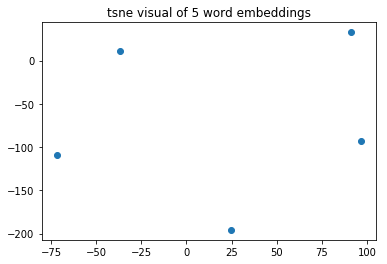

In [65]:
random_x, random_y = zip(*embed)
plt.scatter(random_x,random_y)
plt.title("tsne visual of 5 word embeddings")
plt.show()

Clustering

In [66]:
first_cluster = np.array(embed[np.where(predictions == 0)])
second_cluster = np.array(embed[np.where(predictions == 1)])
third_cluster = np.array(embed[np.where(predictions == 2)])

In [67]:
first_cluster

array([[  96.82745,  -92.75976],
       [  24.85106, -195.75827]], dtype=float32)

In [68]:
second_cluster

array([[91.42209, 32.78118]], dtype=float32)

Text(0.5,1,'k-means clustering of tsne example')

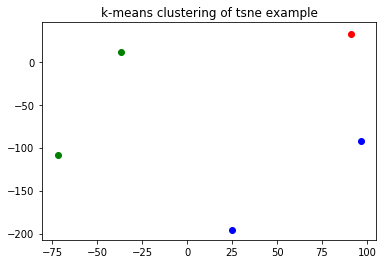

In [69]:
plt.scatter(first_cluster[:,0],first_cluster[:,1], color="blue") #first cluster
plt.scatter(second_cluster[:,0],second_cluster[:,1], color="red") #second cluster
plt.scatter(third_cluster[:,0],third_cluster[:,1], color="green") #second cluster
plt.title("k-means clustering of tsne example")

Now, let's do this with the entire set.

In [70]:
kmeans = KMeans(n_clusters=15)
predictions = kmeans.fit_predict(dense)
tsne = TSNE(n_components=2)

Text(0.5,1,'tsne visual of 5 word embeddings')

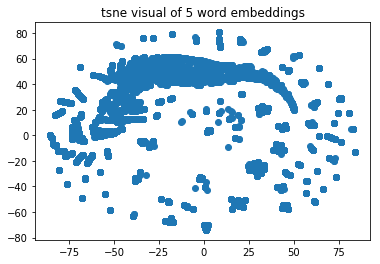

In [71]:
embed = tsne.fit_transform(dense)
random_x, random_y = zip(*embed)
plt.scatter(random_x,random_y)
plt.title("tsne visual of 5 word embeddings")

In [72]:
first_cluster = np.array(embed[np.where(predictions == 0)])
second_cluster = np.array(embed[np.where(predictions == 1)])
third_cluster = np.array(embed[np.where(predictions == 2)])

Text(0.5,1,'k-means clustering of tsne example')

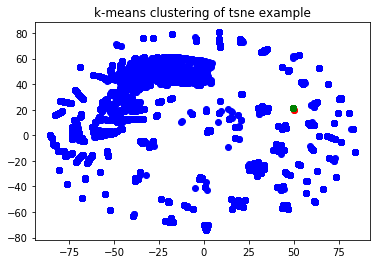

In [73]:
plt.scatter(first_cluster[:,0],first_cluster[:,1], color="blue") #first cluster
plt.scatter(second_cluster[:,0],second_cluster[:,1], color="red") #second cluster
plt.scatter(third_cluster[:,0],third_cluster[:,1], color="green") #second cluster
plt.title("k-means clustering of tsne example")

# 2. Word Vectors via Word2Vec

This unit will focus on Word2Vec as an example of neural net-based approaches of vector encodings, starting with a conceptual overview of the algorithm itself and end with an activity to train participants’ own vectors.
- 0:00 - 0:15 Conceptual explanation of Word2Vec
- 0:15 - 0:30 Word2Vec Visualization and Vectorial Features and Math
- 0:30 - 0:50 [Activity 2] Word2Vec Construction [using Gensim] and Visualization (from part 1) [We provide corpus]

https://arxiv.org/pdf/1310.4546.pdf 


Some theory on Word2Vec & Deep Learning-based representations

> Indented block



In [ ]:
! pip install gensim

THEORIES: What is Word2Vec/GloVe, Deep Learning-based Word Vectors


In [ ]:
import gensim
from nltk.tokenize import sent_tokenize
from nltk.tokenize.treebank import TreebankWordTokenizer

In [ ]:
#Remember our large corpus with three novels?
corpus

In [ ]:
sentences = sent_tokenize(corpus[0])  ### split your corpus into sentences


In [ ]:
tokenizer = TreebankWordTokenizer()

In [ ]:
#takes as input a list of txt and converts it for gensim word2vec model (lower case, sentence tokenization, tokenization)
# sentences = [['hi', 'sentence'], ['this', 'is', 'a', 'sentence']]

def makeSentences(list_txt):
  all_txt = []
  for txt in list_txt:
    lower_txt = txt.lower()
    sentences = sent_tokenize(lower_txt)
    sentences = [tokenizer.tokenize(sent) for sent in sentences]
    all_txt += sentences
    print(len(sentences))
  return all_txt

In [ ]:
sentences = makeSentences(corpus) 

In [ ]:
model = gensim.models.Word2Vec(sentences, min_count=1, size=100)
#Talk about parameters here: what is the min_count? size?

In [ ]:
model.save('/tmp/model')

In [ ]:
our_model = gensim.models.Word2Vec.load('/tmp/model')

In [ ]:
model.wv['is']

In [ ]:
model.wv['you']

In [ ]:
model.wv['love']

In [ ]:
type(model.wv)

In [ ]:
my_model = model.wv

In [ ]:
del model #to save RAM


In [ ]:
len(my_model.vocab) #number of words in our model

In [ ]:
#similarity tasks

In [ ]:
my_model.most_similar(positive=['love','happy'], negative=['murder'])

In [ ]:
my_model.most_similar_cosmul(positive=['woman','king'], negative=['man'])

In [ ]:
my_model.similarity('woman','man')

In [ ]:
my_model.similarity('woman','dance')

In [ ]:
# see documentation here for more built-in tools! https://radimrehurek.com/gensim/models/keyedvectors.html



TODO: Theory on different parameters of Word2Vec that you can tune!

In [ ]:
#For now, let's work with some pretrained vectors

TODO What are good vectors? What are bad vectors? How much training/data do we need?

In [ ]:
import gensim.downloader as pretrained

In [ ]:
#all corpora available
pretrained.info()['corpora'].keys()


In [ ]:
pretrained.info()['corpora']

In [ ]:
#all models available
pretrained.info()['models'].keys()

In [ ]:
#let's work with the word2vec trained on google news
#let's look at some description
pretrained.info('')

In [ ]:
news_model = pretrained.load('word2vec-google-news-300')

In [ ]:
news_model.most_similar(positive=['love','happy'], negative=['murder'])

# 3. Pre-trained Models and Extended Vector Algorithms

# 4. Role of Bias in Word Embeddings